In [41]:
import scipy.io.wavfile as wf
import matplotlib.pyplot as plt
import numpy as np

WINDOW = 2000
OVERLAP = 1000
THRESHOLD = 0.6
MIN_SPEECH = 300
MAX_SPEECH = 3000

def _calculate_frequencies(audio_data, rate):
    data_freq = np.fft.fftfreq(len(audio_data),1/rate)
    data_freq = data_freq[1:]
    return data_freq

def _calculate_energy(audio_data):
    data_ampl = np.abs(np.fft.fft(audio_data))
    data_ampl = data_ampl[1:]
    return data_ampl ** 2

def _connect_energy_with_frequencies(data, rate):
    data_freq = _calculate_frequencies(data, rate)
    data_energy = _calculate_energy(data)
    
    energy_freq = {}
    for (i, freq) in enumerate(data_freq):
        if abs(freq) not in energy_freq:
            energy_freq[abs(freq)] = data_energy[i] * 2
    return energy_freq

def sum_energy_in_band(energy_frequencies):
    sum_energy = 0
    for f in energy_frequencies.keys():
        if MIN_SPEECH < f < MAX_SPEECH:
            sum_energy += energy_frequencies[f]
    return sum_energy


def vad(filename):
    rate, data = wf.read(filename)
    print(rate)
    if len(data.shape) == 2 :
        data = np.mean(data, axis=1, dtype=data.dtype)
        channels = 1
        
    data = abs(data)
    plt.figure(figsize=(12,8))
    plt.plot(np.arange(len(data)), data)
    plt.title("Raw audio signal")
    plt.show()
    start = 0
    detected = []
    
    while start < len(data) - WINDOW:
        end = min(start + WINDOW, len(data - 1))
        data_window = data[start:end]

        # Full energy
        energy_freq = _connect_energy_with_frequencies(data_window, rate)
        
        # Speech ratio
        speech_ratio = sum_energy_in_band(energy_freq) / sum(energy_freq.values())
        detected.append(speech_ratio > THRESHOLD)
        start += OVERLAP
        
    return detected
    

In [42]:
def plotVad(filename):
    detectedVoice = vad(filename);
    plt.plot(np.array(detectedVoice), label="Detected")
    plt.legend()
    plt.title(filename + ": detected vs. non-detected region")
    plt.show()

8000


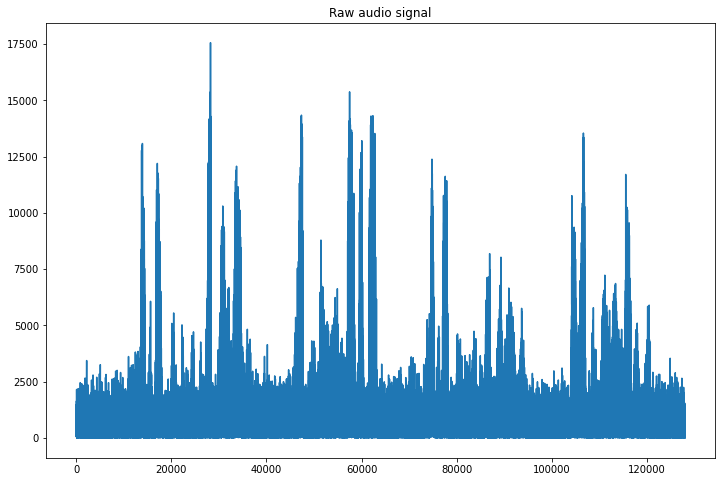

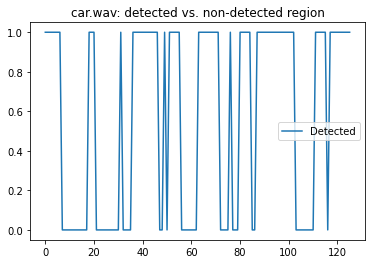

In [43]:
plotVad('car.wav')